In [213]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC

In [214]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [215]:
selected_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
class_names = ['apple', 'orange', 'banana', 'dog', 'cat', 'bird', 'fish', 'car', 'truck', 'airplane',
               'deer', 'frog', 'horse', 'rabbit', 'squirrel', 'duck', 'elephant', 'lizard', 'cow', 'sheep']
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Create boolean masks to select only the desired classes for training and testing
train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

# Apply the masks to filter images and labels
X_train_filtered = X_train[train_mask]
y_train_filtered = y_train[train_mask]
X_test_filtered = X_test[test_mask]
y_test_filtered = y_test[test_mask]

# Normalize the image pixel values to [0, 1]
X_train_filtered = X_train_filtered.astype('float32') / 255.0
X_test_filtered = X_test_filtered.astype('float32') / 255.0

# One-hot encode the labels for the 20 selected classes
y_train_oh = to_categorical(y_train_filtered, num_classes=20)
y_test_oh = to_categorical(y_test_filtered, num_classes=20)


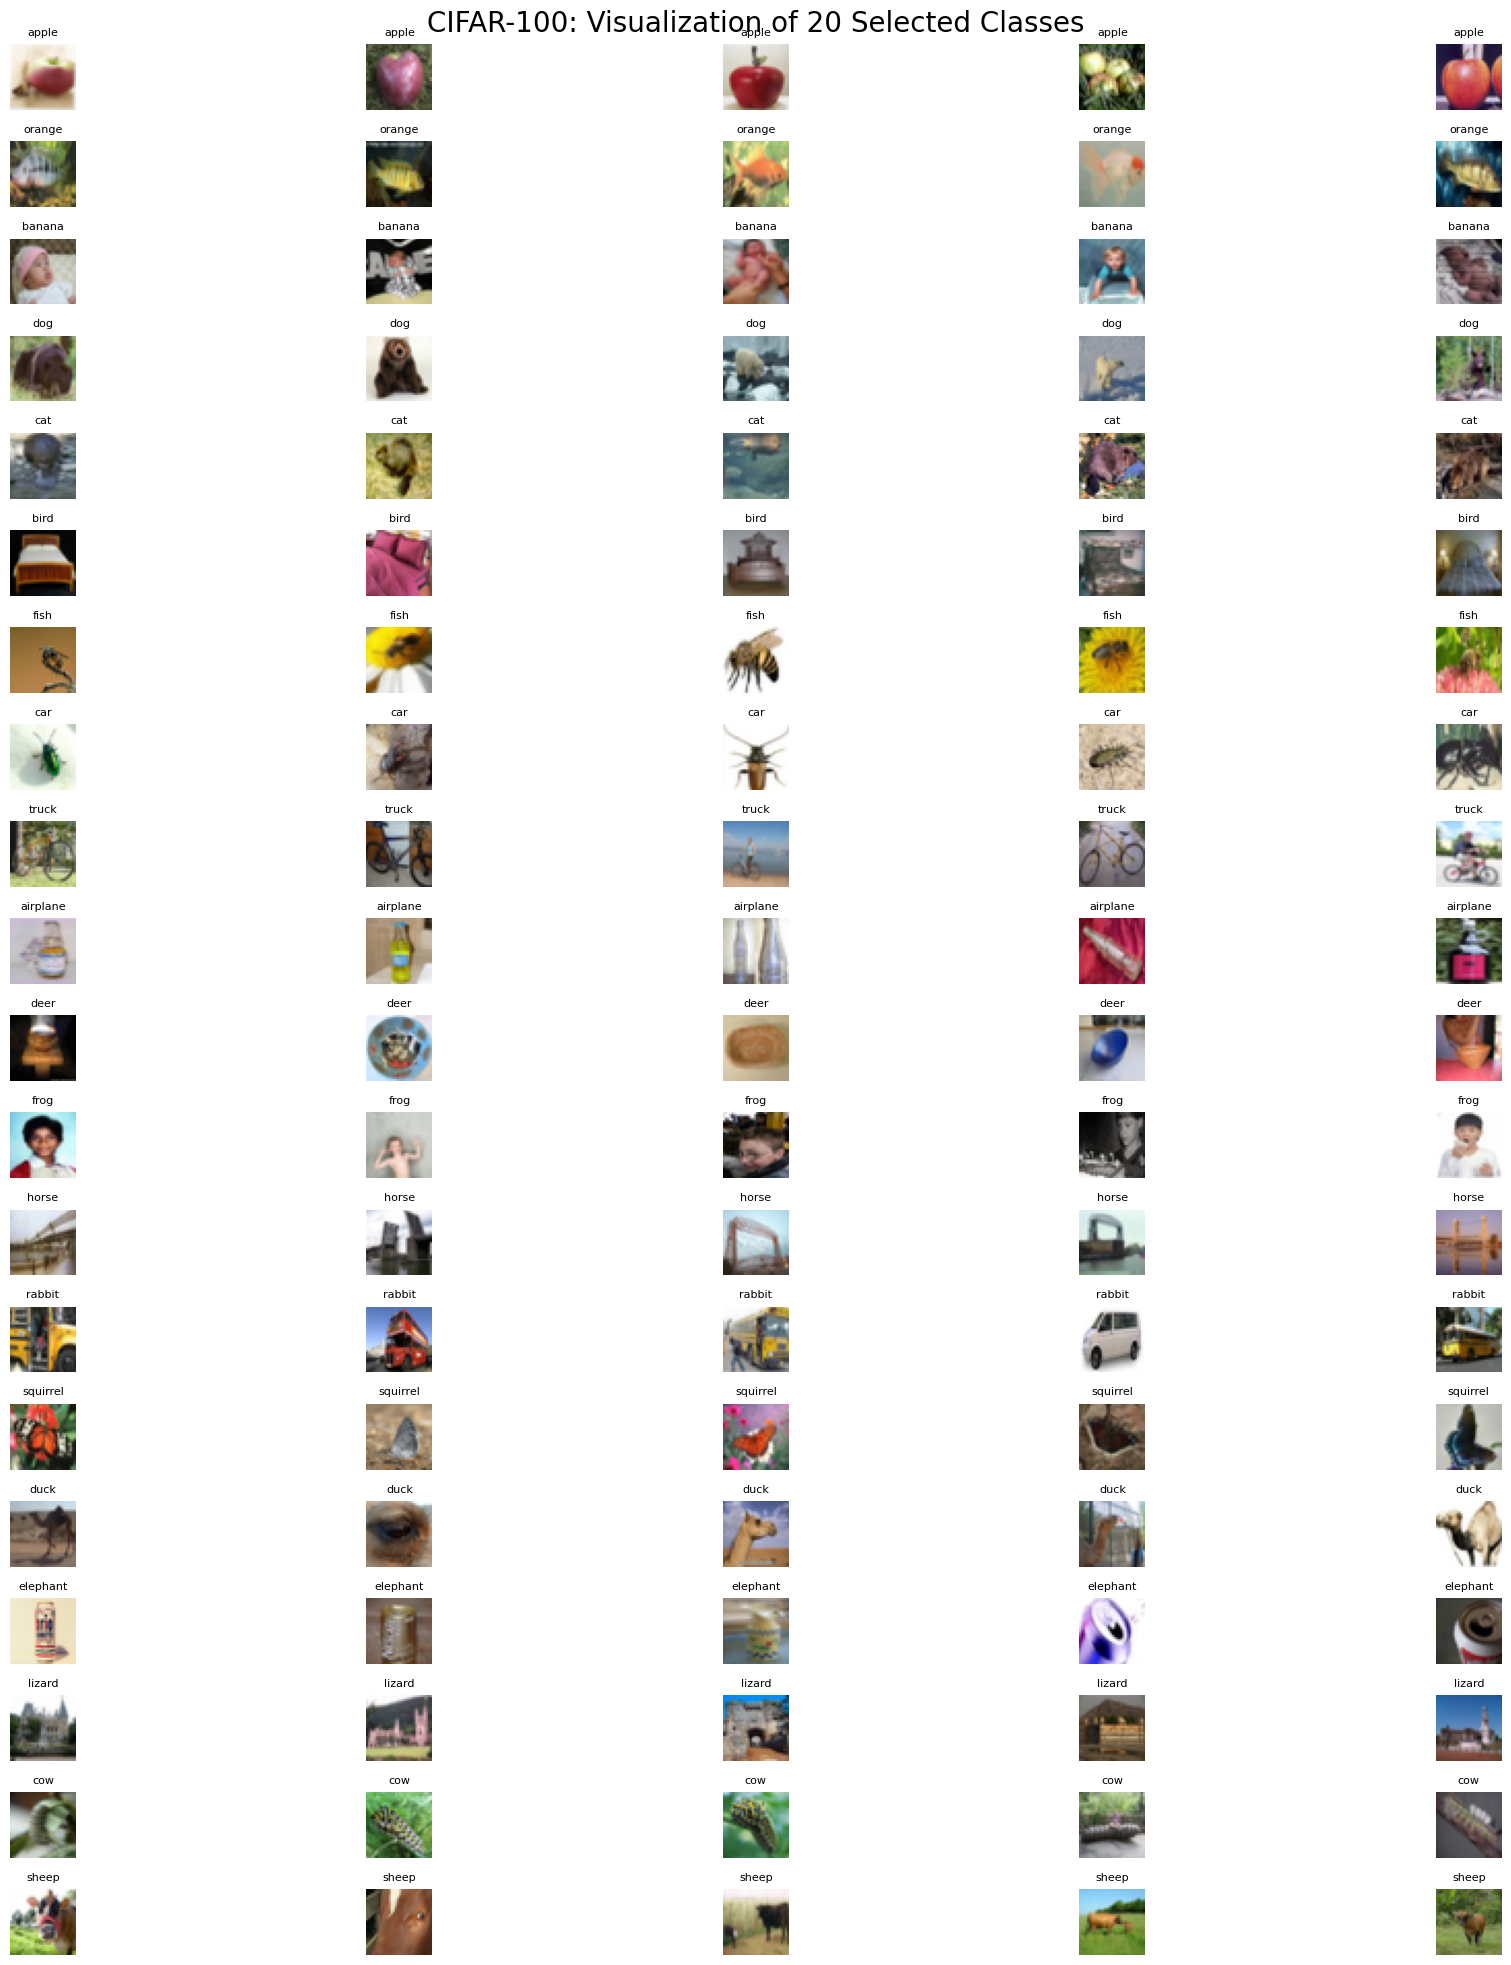

In [216]:
class_names = ['apple', 'orange', 'banana', 'dog', 'cat', 'bird', 'fish', 'car', 'truck', 'airplane',
               'deer', 'frog', 'horse', 'rabbit', 'squirrel', 'duck', 'elephant', 'lizard', 'cow', 'sheep']

# Create a figure for plotting
plt.figure(figsize=(20, 20))

# For each of the 20 classes, plot 5 sample images
for class_index, class_label in enumerate(range(20)):  # assuming class_label is remapped 0-19
    # Find all indices in y_train_filtered with this class
    indices = np.where(np.argmax(y_train_oh, axis=1) == class_label)[0]

    for i in range(5):
        plt.subplot(20, 5, class_index * 5 + i + 1)
        plt.imshow(X_train_filtered[indices[i]])
        plt.title(class_names[class_index], fontsize=8)
        plt.axis('off')

plt.suptitle("CIFAR-100: Visualization of 20 Selected Classes", fontsize=20)
plt.tight_layout()
plt.show()

In [218]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 kernel_regularizer=l2(0.0005), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Conv Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                 kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# ANN Part
model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(20, activation='softmax'))  # For 20 classes

In [219]:
model.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)                  │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_127              │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_89 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_145 (Dropout)                │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_106 (Conv2D)                  │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_128              │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_90 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_146 (Dropout)                │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_38 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_129              │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_147 (Dropout)                │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_130              │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_148 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_131              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_149 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 20)                  │           2,5

 Total params: 2,287,828 (8.73 MB)

 Trainable params: 2,285,844 (8.72 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [220]:
model.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

In [221]:
model.fit(X_train_filtered, y_train_oh, batch_size=32, epochs=10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.0794 - loss: 4.4297
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1575 - loss: 3.7594
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2078 - loss: 3.4985
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2461 - loss: 3.2929
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2785 - loss: 3.1636
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3004 - loss: 3.0506
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3260 - loss: 2.9525
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3515 - loss: 2.8499
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3696 - loss: 2.7893
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3896 - loss: 2.7141


In [222]:
model.evaluate(X_test_filtered, y_test_oh)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4158 - loss: 2.6566


[2.6376712322235107, 0.42100000381469727]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


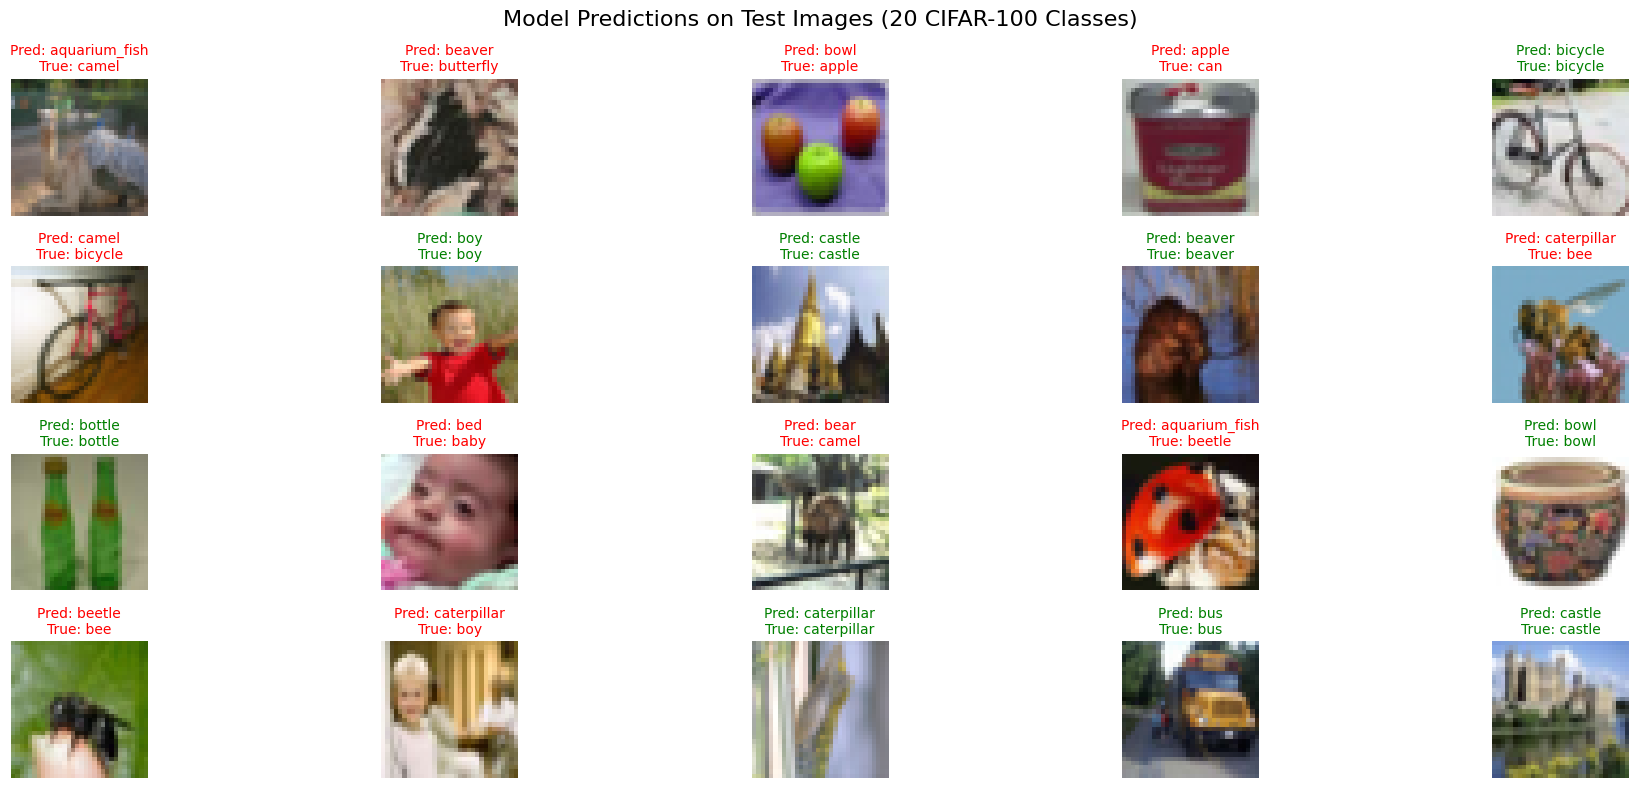

In [223]:
pred_probs = model.predict(X_test_filtered[:20])
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_oh[:20], axis=1)

# Class labels for 20 selected classes from CIFAR-100 (example)
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
    'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly',
    'camel', 'can', 'castle', 'caterpillar', 'cattle'
]

# Plot predictions with color-coded titles
plt.figure(figsize=(20, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test_filtered[i])
    plt.title(
        f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
        color="green" if pred_classes[i] == true_classes[i] else "red",
        fontsize=10
    )
    plt.axis('off')

plt.suptitle("Model Predictions on Test Images (20 CIFAR-100 Classes)", fontsize=16)
plt.tight_layout()
plt.show()

feature extract through svm

In [192]:
# Reshape X_train_filtered to 2D: (num_samples, num_features)
num_samples = X_train_filtered.shape[0]
num_features = np.prod(X_train_filtered.shape[1:])  # Total pixels per image
X_train_reshaped = X_train_filtered.reshape(num_samples, num_features)

# Convert one-hot encoded labels to class labels
y_train_labels = np.argmax(y_train_oh, axis=1)  # Get class labels from one-hot encoding

# Now you can fit the SVM using the class labels
svm = SVC(kernel='rbf', probability=True, gamma='scale')
svm.fit(X_train_reshaped, y_train_labels) # Use y_train_labels instead of y_train_oh

SVC(probability=True)

In [195]:
# --- Training data reshaping (as before) ---
num_train_samples = X_train_filtered.shape[0]
num_features = np.prod(X_train_filtered.shape[1:])
X_train_reshaped = X_train_filtered.reshape(num_train_samples, num_features)

# --- Testing data reshaping ---
num_test_samples = X_test_filtered.shape[0]
X_test_reshaped = X_test_filtered.reshape(num_test_samples, num_features)

train_svm_features = svm.predict_proba(X_train_reshaped)
test_svm_features = svm.predict_proba(X_test_reshaped)


In [196]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(20,)),  # 20 superclasses
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(20, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [197]:
model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)                    │ (None, 512)                 │          10,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_138 (Dropout)                │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_139 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,220 (575.08 KB)

 Trainable params: 147,220 (575.08 KB)

 Non-trainable params: 0 (0.00 B)

In [203]:
# ipython-input-198-ecf1a7a41dec
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Changed loss function
              metrics=['accuracy'])

In [204]:
# ipython-input-202-ecf1a7a41dec
history = model.fit(train_svm_features, y_train_oh,
                    epochs=30,
                    batch_size=128)

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5083 - loss: 2.5119
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - loss: 1.2528
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - loss: 1.1886
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - loss: 1.1949
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - loss: 1.1586
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6848 - loss: 1.1493
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - loss: 1.1354
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - loss: 1.1320
Epoch 9/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6919 - loss: 1.1226
Epoch 10/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7082 - loss: 1.0763
Epoch 11/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - loss: 1.1382
Epoch 12/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6996 - l

In [209]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_svm_features, y_test_oh)

# Print the evaluation results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4471 - loss: 2.1090
Test Loss: 2.1135
Test Accuracy: 0.4465


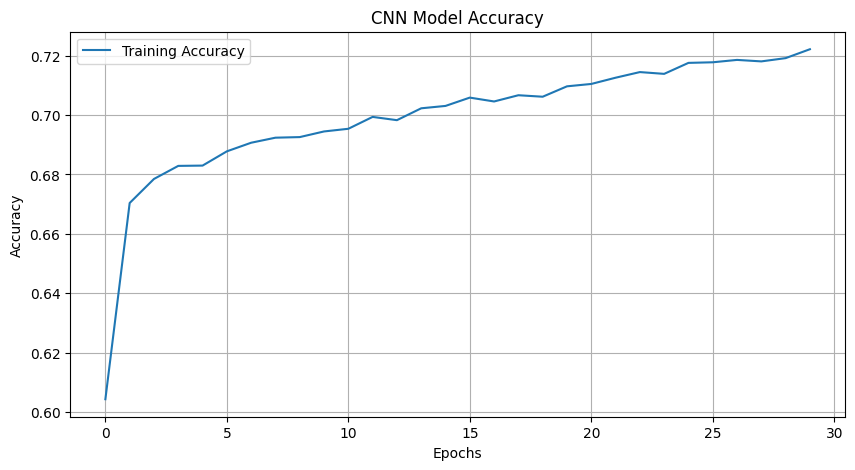

In [211]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()